### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [81]:
import pandas as pd
import numpy as np

In [82]:
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

In [83]:
len(df_train)
test_user_ids = df_test["user_id"].unique()

In [10]:
def random_sampler(df, user_ids, multiple=1):
    """
    df: a DataFrame to sample from;
    user_ids: a list / array with user ids you want to see in your sample
    multiple: the quantity of examples each id should present in the sample,
              if there is not enough examples in the df for a certain id,
              it returns all of them.
    ---
    sample_index: an array with df indices for the sample
    """
    sample_index = []
    for user_id in user_ids:
        l = df[df["user_id"] == user_id].index.values
        if multiple <= len(l):
            x = np.random.choice(l, multiple, replace=False) 
            sample_index.append(x)
        else:
            sample_index.append(l)
    return np.concatenate(sample_index, axis=0)

ids_for_test = random_sampler(df_train, test_user_ids)

### Analisando quantidade de registro por usuário

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use(['dark_background'])
#plt.style.use('ggplot')
register_count = df_train["user_id"].value_counts()
register_count.describe()
# plt.show()

count    19918.000000
mean       379.496787
std        508.267045
min          1.000000
25%         66.000000
50%        197.000000
75%        495.000000
max       6317.000000
Name: user_id, dtype: float64

(array([  1.61650000e+04,   2.60900000e+03,   7.13000000e+02,
          2.60000000e+02,   9.50000000e+01,   3.80000000e+01,
          2.10000000e+01,   8.00000000e+00,   6.00000000e+00,
          3.00000000e+00]),
 array([  1.00000000e+00,   6.32600000e+02,   1.26420000e+03,
          1.89580000e+03,   2.52740000e+03,   3.15900000e+03,
          3.79060000e+03,   4.42220000e+03,   5.05380000e+03,
          5.68540000e+03,   6.31700000e+03]),
 <a list of 10 Patch objects>)

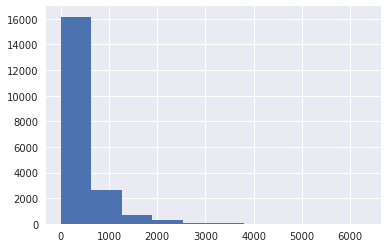

In [85]:
%matplotlib inline
plt.hist(df_train["user_id"].value_counts())

In [86]:
threshold = 1

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

252
19666


In [87]:
### select users for specific
df_train = df_train[df_train["user_id"].isin(user_for_specific_model)]
df_test = df_test[df_test["user_id"].isin(user_for_specific_model)]
df_train.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id', u'album_id', u'context_type', u'release_date', u'platform_name', u'platform_family', u'media_duration', u'listen_type',
       u'user_gender', u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year', u'diff_ts_listen_AND_release_date_D', u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY', u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK', u'ts_listen_PERIOD_OF_DAY', u'user_age_group',
       u'diff_user_song_age', u'media_decade', u'artist_albuns', u'artist_fans', u'artist_radio', u'media_bpm', u'media_rank', u'user_id_id'],
      dtype='object')

In [88]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,0,2,16.580822,7,1.0,32.0,1.0,100.1,292784.0,9241
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,2,2,19.241096,7,18.0,6204.0,1.0,160.2,317348.0,16547
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,0,2,26.646575,8,23.0,20022.0,1.0,90.1,309034.0,7665
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,0,2,13.915068,6,56.0,442765.0,1.0,124.9,291331.0,1580
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,1,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812


In [89]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
#pd.set_option("precision", 2)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,0,2,16.580822,7,1.0,32.0,1.0,100.1,292784.0,9241
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,2,2,19.241096,7,18.0,6204.0,1.0,160.2,317348.0,16547
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,0,2,26.646575,8,23.0,20022.0,1.0,90.1,309034.0,7665
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,0,2,13.915068,6,56.0,442765.0,1.0,124.9,291331.0,1580
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,1,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812


In [90]:
# pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

In [91]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

In [92]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

### Append User Specific

In [93]:
df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]


df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)


df_user.columns.values

array(['user_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow'], dtype=object)

In [94]:
# x = pd.isnull(df_user).sum()
# x[x > 0]

In [95]:
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,1.0,32.0,1.0,100.1,292784.0,9241,41,48,57,71
1,7,2016-12-01 10:48:50,4301418,400118,9,2009-10-16 00:00:00,1,0,7.0,0,...,15.0,174688.0,1.0,102.0,884679.0,9241,41,48,57,71
2,10,2016-11-30 11:48:22,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,4.0,333536.0,1.0,129.0,783895.0,9241,41,48,57,71
3,10,2016-12-01 07:18:24,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,4.0,333536.0,1.0,129.0,783895.0,9241,41,48,57,71
4,10,2016-11-29 09:42:52,983248,109347,1,2002-10-21 00:00:00,1,0,3.0,1,...,4.0,333536.0,1.0,129.0,783895.0,9241,41,48,57,71


### Check for NA
#### Ver depois sobre o user_age_group!

In [96]:
# x = pd.isnull(df_train).sum()
# x[x > 0]

In [97]:
# df_train.dropna(inplace=True)

In [98]:
# x = pd.isnull(df_train).sum()
# x[x > 0]
# del x

In [99]:
y = df_train["is_listened"].values

In [100]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

### Let's inspect the categorical variables!

In [101]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 2922
media_id: 452947
album_id: 151454
context_type: 74
release_date: 8901
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 19666
artist_id: 67128
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [102]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [103]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family',
       'media_duration', 'listen_type', 'user_gender', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'ts_listen_DAY_OF_WEEK',
       'ts_listen_PERIOD_OF_DAY', 'user_age_group', 'diff_user_song_age',
       'media_decade', 'artist_albuns', 'artist_fans', 'artist_radio',
       'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow'], dtype=object)

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [104]:
cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
#                   "listen_type", 
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id"]
                #"media_decade"]


target = "is_listened"

In [105]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [106]:
te.fit(df_train)

In [107]:
te.transform(df_train)
te.transform(df_test)
del te

In [108]:
print("das")

das


In [109]:
print("teste")

teste


In [110]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

In [111]:
rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

In [112]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [113]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow
0,0.688147,2016-12-01 11:00:15,0.000000,41774,0.695605,2004-07-04 00:00:00,1,0,4.0,0.721117,...,1.0,32.0,1.0,100.1,292784.0,9241,41,48,57,71
1,0.663153,2016-12-01 10:48:50,0.736878,400118,0.758072,2009-10-16 00:00:00,1,0,7.0,0.721117,...,15.0,174688.0,1.0,102.0,884679.0,9241,41,48,57,71
2,0.724498,2016-11-30 11:48:22,0.631609,109347,0.688533,2002-10-21 00:00:00,1,0,3.0,0.721117,...,4.0,333536.0,1.0,129.0,783895.0,9241,41,48,57,71
3,0.724498,2016-12-01 07:18:24,0.631609,109347,0.688533,2002-10-21 00:00:00,1,0,3.0,0.721117,...,4.0,333536.0,1.0,129.0,783895.0,9241,41,48,57,71
4,0.724498,2016-11-29 09:42:52,0.631609,109347,0.573602,2002-10-21 00:00:00,1,0,3.0,0.600280,...,4.0,333536.0,1.0,129.0,783895.0,9241,41,48,57,71


In [114]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [115]:
print(df_train.head())

   genre_id            ts_listen  media_id  album_id  context_type         release_date  media_duration  listen_type   user_id  artist_id            ...              user_age_group_2  \
0  0.688147  2016-12-01 11:00:15  0.000000     41774      0.695605  2004-07-04 00:00:00             4.0     0.721117  0.676991      58019            ...                             1   
1  0.663153  2016-12-01 10:48:50  0.736878    400118      0.758072  2009-10-16 00:00:00             7.0     0.721117  0.676991        599            ...                             1   
2  0.724498  2016-11-30 11:48:22  0.631609    109347      0.688533  2002-10-21 00:00:00             3.0     0.721117  0.676991         66            ...                             1   
3  0.724498  2016-12-01 07:18:24  0.631609    109347      0.688533  2002-10-21 00:00:00             3.0     0.721117  0.676991         66            ...                             1   
4  0.724498  2016-11-29 09:42:52  0.631609    109347      0.573602  20

In [116]:
#df_train = rank_categorical(df_train, cols_for_rank)

In [117]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'media_duration', 'listen_type', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age',
       'media_decade', 'artist_albuns', 'artist_fans', 'artist_radio',
       'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'platform_name_1', 'platform_name_2', 'platform_family_1',
       'platform_family_2', 'user_gender_1', 'user_age_group_1',
       'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1',
       'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3',
       'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5',
       'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PE

In [118]:
%timeit
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text", 'release_date_DAY', 'release_date_MONTH']#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [119]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)

In [120]:
features = [col for col in df_train.columns.values if col != target]
features

['genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'nmidia_regular_listened',
 'nmidia_with_flow_listened',
 'nmidia_regular',
 'nmidia_with_flow',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [121]:

df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [122]:
pd.isnull(df_train).sum()

genre_id                             0
media_id                             0
context_type                         0
media_duration                       0
listen_type                          0
user_id                              0
user_age                             0
is_listened                          0
diff_ts_listen_AND_release_date_D    0
diff_ts_listen_AND_release_date_M    0
diff_ts_listen_AND_release_date_Y    0
release_date_YEAR                    0
diff_user_song_age                   0
media_decade                         0
artist_albuns                        0
artist_fans                          0
artist_radio                         0
media_bpm                            0
media_rank                           0
user_id_id                           0
nmidia_regular_listened              0
nmidia_with_flow_listened            0
nmidia_regular                       0
nmidia_with_flow                     0
platform_name_1                      0
platform_name_2          

In [123]:
ids_for_test

array([3462691, 3943117, 2025353, ..., 3869756, 4063740, 1557433])

In [124]:
df_for_train = df_train[~df_train.index.isin(ids_for_test)]
submission_sample = df_train[df_train.index.isin(ids_for_test)]

X_train = df_for_train[features]
y_train = df_for_train[target]

X_test = submission_sample[features]
y_test = submission_sample[target]

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
# X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)
# import gc
# gc.collect()

### Feature Selection

In [127]:
from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

36 selected variables from 39, 92.31%
['genre_id', 'media_id', 'context_type', 'media_duration', 'listen_type', 'user_id', 'user_age', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'media_decade', 'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [128]:
features = all_select_features
# X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)
X_train = df_for_train[features]
y_train = df_for_train[target]

X_test = submission_sample[features]
y_test = submission_sample[target]

In [129]:
X_test

,genre_id,media_id,context_type,media_duration,listen_type,user_id,user_age,diff_ts_listen_AND_release_date_D,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,...,user_gender_1,user_age_group_1,user_age_group_2,ts_listen_DAY_OF_WEEK_1,ts_listen_DAY_OF_WEEK_4,ts_listen_DAY_OF_WEEK_5,ts_listen_DAY_OF_WEEK_6,ts_listen_PERIOD_OF_DAY_1,ts_listen_PERIOD_OF_DAY_2,ts_listen_PERIOD_OF_DAY_3
100,0.701156,0.677015,0.878661,4.0,0.721117,0.676991,29,73.0,2.433333,0.200000,...,0,0,1,0,0,0,0,0,0,0
530,0.724498,0.758979,0.573602,3.0,0.600280,0.986755,29,4290.0,143.000000,11.753425,...,1,0,1,0,0,0,0,1,0,0
716,0.701156,0.786026,0.688533,3.0,0.721117,0.586977,30,14.0,0.466667,0.038356,...,1,0,1,0,1,0,0,0,0,1
871,0.701156,0.687740,0.688533,3.0,0.721117,0.586977,30,19.0,0.633333,0.052055,...,1,0,1,0,0,0,0,1,0,0
971,0.701156,0.622610,0.999507,3.0,0.721117,0.586977,30,137.0,4.566667,0.375342,...,1,0,1,1,0,0,0,1,0,0
2097,0.724393,0.729902,0.527591,5.0,0.600280,0.933868,24,1001.0,33.366667,2.742466,...,1,1,0,0,0,0,0,1,0,0
2985,0.701156,1.000000,0.660714,17.0,0.600280,0.991268,28,15.0,0.500000,0.041096,...,1,0,1,0,0,1,0,1,0,0
3546,0.701156,1.000000,0.660714,4.0,0.600280,0.991268,28,25.0,0.833333,0.068493,...,1,0,1,1,0,0,0,1,0,0
3660,0.748651,0.771429,0.688533,3.0,0.721117,0.991268,28,6805.0,226.833333,18.643836,...,1,0,1,1,0,0,0,0,1,0
3733,0.609060,0.701435,0.573602,3.0,0.600280,0.991268,28,2841.0,94.700000,7.783562,...,1,0,1,0,0,0,0,1,0,0


In [130]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [131]:
# %timeit
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

In [132]:
# print(model.score(X_test, y_test))
# complete_report(y_test, model.predict(X_test))

acc: 0.70345496362865445  
roc: 0.6912675674785278

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
# confusion_matrix(y_test, model.predict(X_test))

In [135]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.78306054824781601

*********************************
Accuracy: 0.78
Precision: 0.839193419233
Recall: 0.845161290323
F1-Score: 0.842166782336
[[ 4069  2209]
 [ 2112 11528]]
Roc Area: 0.746648819739


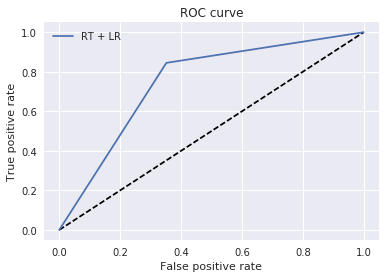

*********************************


0.7466488197391814

In [136]:
complete_report(y_test, model.predict(X_test))

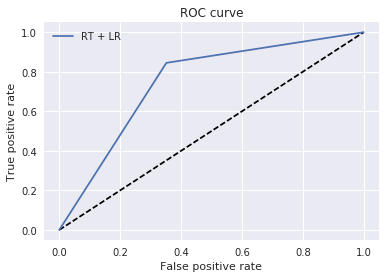

In [137]:
roc_curve_label(y_test, model.predict(X_test))

In [138]:
print(len(df_test))

19666


In [139]:
df_test_group_1 = df_test#[df_test["user_id"].isin(user_for_specific_model)].copy(deep=True)
p = model.predict_proba(df_test_group_1[features])
p = p[:, 1]
df_test_group_1["prediction"] = p
df_test_group_1["prediction"].head()

0    0.9
1    0.5
2    0.6
3    0.6
4    1.0
Name: prediction, dtype: float64

In [57]:
df_test_group_1.fillna(0, inplace=True)

In [58]:
print(len(df_test))
print(len(df_test_group_1))
df_test_group_1[["prediction", "user_id_id"]]
df_test_group_1[["prediction", "user_id_id"]].to_csv("group1.csv")

19666
19666


In [59]:
import gc
gc.collect()
del df_test_group_1

In [3]:
import pandas as pd
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

# df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# # pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
# df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
# df_user.columns.values
# df_train = pd.merge(df_train, df_user, on="user_id")
# df_test = pd.merge(df_test, df_user, on="user_id")
# del df_user


### select users for general

#df_train = df_train[df_train["user_id"].isin(user_for_general_model)]

threshold = 1

register_count = df_train["user_id"].value_counts()

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id"]



target = "is_listened"

df_test = df_test[df_test["user_id"].isin(user_for_general_model)]
df_train.columns

te = TargetEncoder(cols_for_target_encoder, "is_listened")
te.fit(df_train)
te.transform(df_train)
te.transform(df_test)
del te

rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

%timeit
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

features = [col for col in df_train.columns.values if col != target]
features

252
19666


['Unnamed: 0',
 'Unnamed: 0.1',
 'genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [4]:
features

['Unnamed: 0',
 'Unnamed: 0.1',
 'genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [5]:
len(df_test)

252

In [6]:
features = ['genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [14]:
df_test = df_test.fillna(df_train.mean())
pd.isnull(df_test).sum()

Unnamed: 0                           0
Unnamed: 0.1                         0
sample_id                            0
genre_id                             0
media_id                             0
context_type                         0
media_duration                       0
listen_type                          0
user_id                              0
user_age                             0
diff_ts_listen_AND_release_date_D    0
diff_ts_listen_AND_release_date_M    0
diff_ts_listen_AND_release_date_Y    0
release_date_DAY                     0
release_date_MONTH                   0
release_date_YEAR                    0
diff_user_song_age                   0
media_decade                         0
media_bpm                            0
media_rank                           0
artist_albuns                        0
artist_fans                          0
artist_radio                         0
user_id_id                           0
platform_name_1                      0
platform_name_2          

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [19] are constant.
  UserWarning)
/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


31 selected variables from 34, 91.18%
['genre_id', 'media_id', 'context_type', 'media_duration', 'listen_type', 'user_id', 'user_age', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'media_decade', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.76559899561042599

In [9]:
### 0.7678

In [10]:
#df_test[df_test["user_id"].isin(user_for_general_model)].head()

In [15]:
df_test_group_2 = df_test #[df_test["user_id"].isin(user_for_general_model)].copy(deep=True)
p = model.predict_proba(df_test_group_2[features])
p = p[:, 1]
df_test_group_2["prediction"] = p
df_test_group_2["prediction"].head()

140    0.8
266    0.3
321    1.0
326    0.1
363    0.8
Name: prediction, dtype: float64

In [16]:
df_test_group_2[["user_id_id", "prediction"]].to_csv("group2.csv")

In [17]:
df_test_group_1 = pd.read_csv("group1.csv", index_col="user_id_id")
df_test_group_2 = pd.read_csv("group2.csv", index_col="user_id_id")

In [18]:
df_test = pd.read_csv("../data/test_data4.csv")
#df_test = df_test["user_id"]
#df_test["user_id_id"] = df_test["user_id"]
# df_test = pd.merge(df_test, df_test_group_1[["user_id", "prediction"]], on="user_id")
# df_test = pd.merge(df_test, df_test_group_2[["user_id", "prediction"]], on="user_id")
df_test = pd.merge(df_test, df_test_group_1[["prediction"]], left_on="user_id", right_index=True, how="outer")
#df_test.join(df_test_group_2[["prediction"]])
df_test = pd.merge(df_test, df_test_group_2[["prediction"]], left_on="user_id", right_index=True, how="outer")

In [19]:
print(len(df_test_group_1))
print(len(df_test_group_2))
print(len(df_test))

19666
252
19918


In [20]:
#pd.set_option("precision", 10)
#df_test_group_2[["user_id", "prediction"]].head()
a = pd.read_csv("../data/test_data4.csv")

In [21]:
a["user_id"].head()

0    17698
1    10525
2     8716
3     5443
4     7600
Name: user_id, dtype: int64

In [22]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,...,user_age_group,diff_user_song_age,media_decade,media_bpm,media_rank,artist_albuns,artist_fans,artist_radio,prediction_x,prediction_y
0,0,0,0,50,2016-11-02 14:32:51,683078,82356,1,2002-10-08 00:00:00,0,...,2,15.920548,7,181.0,293191.0,25.0,31649.0,1.0,0.9,NaN
1,1,1,1,2744,2016-11-16 15:25:40,876497,99692,1,1985-12-31 00:00:00,0,...,2,-2.898630,5,88.0,743839.0,10.0,585650.0,1.0,0.6,NaN
2,2,2,2,2744,2016-11-19 07:06:01,876497,99692,1,1985-12-31 00:00:00,0,...,2,-3.906849,5,88.0,743839.0,10.0,585650.0,1.0,0.5,NaN
3,3,3,3,2744,2016-11-06 16:42:09,876500,99692,1,1985-12-31 00:00:00,2,...,2,-0.871233,5,107.0,630042.0,10.0,585650.0,1.0,0.5,NaN
4,4,4,4,2744,2016-11-29 17:42:40,876504,99692,1,1985-12-31 00:00:00,2,...,2,-1.934247,5,110.0,372256.0,10.0,585650.0,1.0,0.9,NaN


In [23]:
df_test["prediction_x"].fillna(0, inplace=True)
df_test["prediction_y"].fillna(0, inplace=True)
df_test["prediction"] = df_test["prediction_x"] + df_test["prediction_y"]

In [24]:
df_test["prediction"].head()

0    0.9
1    0.6
2    0.5
3    0.5
4    0.9
Name: prediction, dtype: float64

In [25]:
df_test.ix[8716]["prediction"]

0.90000000000000002

In [26]:
df_test["prediction"].values[:5]

array([ 0.9,  0.6,  0.5,  0.5,  0.9])

In [27]:
len(df_test)

19918

In [28]:
(df_test["prediction"] > 1.0).sum()

0

In [29]:
pd.isnull(df_test["prediction_y"]).sum()

0

In [30]:
#df_test["prediction"] = df_test["prediction"].apply(lambda x : 1 if x > 1 else x)

In [31]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [32]:
#p = model.predict_proba(df_test[features])
#p = p[:, 1]
p = df_test["prediction"].values

In [33]:
build_kaggle_submission(p, "rand_all_data_m2")

In [34]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
print(sys.getsizeof(model) / 1e6)

1572.23404
9.560672
6.4e-05


In [35]:
!ls

0-EDA.ipynb
10 - XGBoost + Threshold + data_4.ipynb
1 - First Model.ipynb
2_models_user_groups.csv.gz
2 - Simple Model + Features.ipynb
3 - Simple Model + User Specific.ipynb
4 - XGBoost + User Specific.ipynb
5 - XGBoost + Feature Selection.ipynb
6 - Simple Model + User Specific + Some fixes.ipynb
7 - Simple Model + User Specific + 2 models-Copy1.ipynb
7 - Simple Model + User Specific + 2 models.ipynb
8 - Deezer_API_features.ipynb
8 - Simple Model + User Specific + 2 models thresholds.ipynb
9 - Simple Model + Threshold + data_4.ipynb
Construindo Funcoes pro DataGame.ipynb
Feature Engineering.ipynb
Feature Engineering - User Specific.ipynb
features.py
group1.csv
group2.csv
img
nmidia_feats.csv
__pycache__
qtd_musicas_diferentes_flow_noflow.csv
rand_2m_data4_2.csv.gz
rand_2m_data4.csv.gz
rand_2_models.csv.gz
rand_2_models_fix.csv.gz
rand_2_models_threshold_15.csv.gz
rand_2_models_threshold_1.csv.gz
rand_2_models_threshold_2.csv.gz
rand_2_models_threshold_30.csv.gz
rand_2_models_threshold